In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.patches as mpatches
%matplotlib widget

In [2]:
path = r'C:\Users\Manvydas\Downloads\OneDrive_2023-10-10\2 praktinė užduotis Principiniai komponentai\dat'
names = os.listdir(path)
namesspectraN = [x for x in names if '.dat' in x and 'N_' in x]
print(namesspectraN)
namesspectraT = [x for x in names if '.dat' in x and 'T_' in x]
print(namesspectraT)

['N_P20_T.0.dat', 'N_P21_T.0.dat', 'N_P22_T.0.dat', 'N_P23_T.0.dat', 'N_P24_T.0.dat', 'N_P25_T.0.dat', 'N_P26_T.0.dat', 'N_P27_T.0.dat', 'N_P28_T.0.dat', 'N_P29_T.0.dat', 'N_P30_T.0.dat', 'N_P31_T.0.dat', 'N_P32_T.0.dat', 'N_P33_T.0.dat', 'N_P34_T.0.dat', 'N_P35_T.0.dat', 'N_P36_T.0.dat', 'N_P37_T.0.dat', 'N_P38_T.0.dat', 'N_P39_T.0.dat', 'N_P40_T.0.dat', 'N_P41_T.0.dat', 'N_P42_T.0.dat', 'N_P44_T.0.dat', 'N_P45_T.0.dat', 'N_P46_T.0.dat', 'N_P47_T.0.dat', 'N_P48_T.0.dat', 'N_P49_T.0.dat', 'N_P51_T.0.dat', 'N_P52_T.0.dat', 'N_P53_T.0.dat', 'N_P54_T.0.dat', 'N_P55_T.0.dat', 'N_P57_T.0.dat', 'N_P58_T.0.dat', 'N_P59_T.0.dat', 'N_P61_T.0.dat', 'N_P62_T.0.dat', 'N_P63_T.0.dat', 'N_P64_T.0.dat', 'N_P65_T.0.dat', 'N_P67_T.0.dat', 'N_P68_T.0.dat', 'N_P69_T.0.dat', 'N_P70_T.0.dat', 'N_P71_T.0.dat', 'N_P72_T.0.dat', 'N_P73_T.0.dat']
['T_P21_T.0.dat', 'T_P23_T.0.dat', 'T_P24_T.0.dat', 'T_P25_T.0.dat', 'T_P26_T.0.dat', 'T_P27_T.0.dat', 'T_P28_T.0.dat', 'T_P30_T.0.dat', 'T_P31_T.0.dat', 'T_P33_T.0.d

C:\Users\Manvydas\AppData\Local\Temp\ipykernel_15132\1500925812.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[data_file] = spectrum_data
C:\Users\Manvydas\AppData\Local\Temp\ipykernel_15132\1500925812.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_data[data_file] = spectrum_data
C:\Users\Manvydas\AppData\Local\Temp\ipykernel_15132\1500925812.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

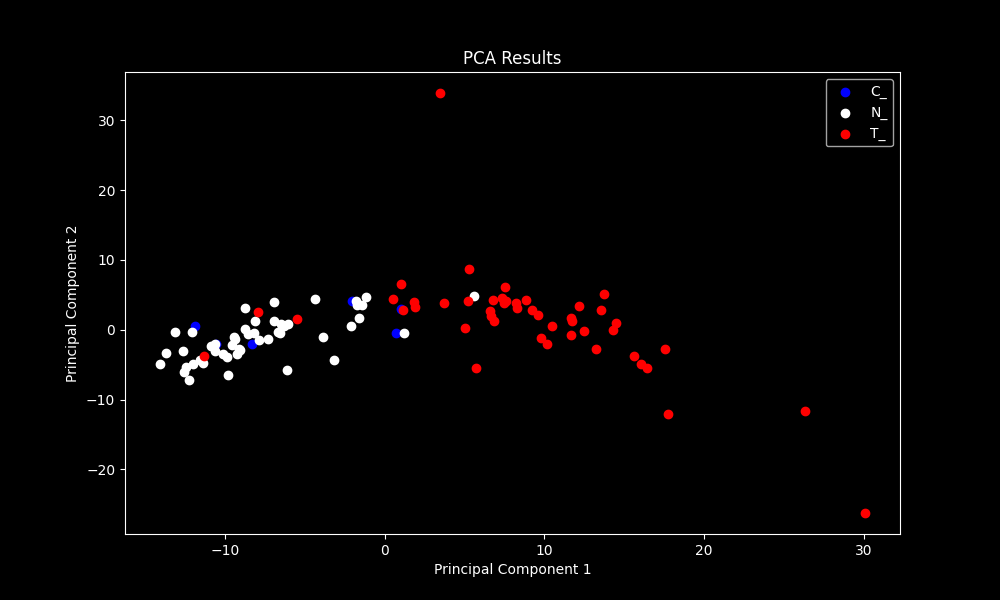

Explained Variance: [101.61476313  41.74056099  32.48359714  30.67611638  12.79475876]
Explained Variance Ratio: [0.39151183 0.16082233 0.12515615 0.1181921  0.04929696]
Cumulative Variance Ratio: [0.39151183 0.55233416 0.67749031 0.79568241 0.84497938]


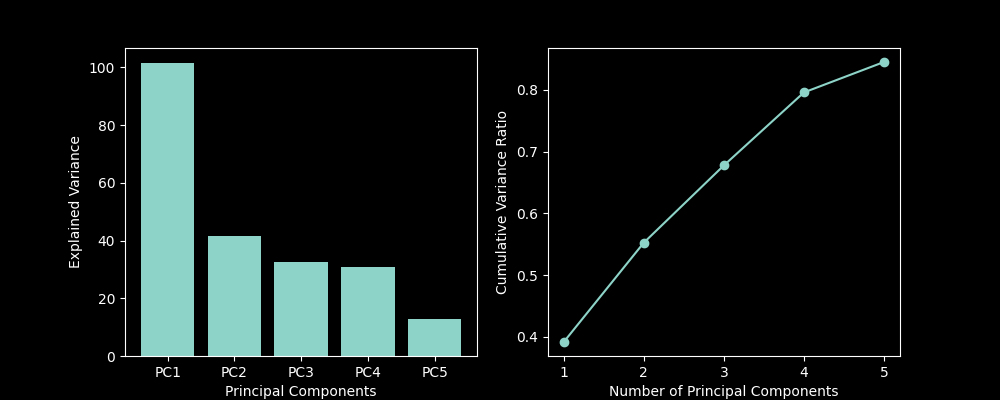

In [5]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# plt.style.use('dark_background')
# Define the directory containing your data files
data_dir = path
names = os.listdir(path)
data_files = [x for x in names if '.dat' in x]

# Create an empty DataFrame to store the combined data

combined_data = pd.DataFrame()
handles = []  # Store legend handles
labels = []  # Store legend labels


# Load the first file to get the first axis data
first_file = pd.read_csv(path + '\\' + data_files[0], delim_whitespace=True)
first_axis = first_file.iloc[:, 0]

# Add the first axis data to the combined DataFrame
combined_data['WL'] = first_axis

# Define a dictionary to map sample names to colors
sample_colors = {'N_': 'white', 'T_': 'red', 'C_': 'blue'}

# Loop through the remaining files and add their spectra data to the combined DataFrame
for data_file in data_files:
    data = pd.read_csv(path + '\\' + data_file, delim_whitespace=True)
    spectrum_data = data.iloc[:, 1]
    combined_data[data_file] = spectrum_data

# Standardize the data for PCA
scaler = StandardScaler()
X_std = scaler.fit_transform(combined_data.iloc[:, 1:].transpose())

# Perform PCA
n_components = 5  # Number of components you want to keep
PCAx = 0
PCAy = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_std)
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()


# Create a scatter plot to visualize the PCA results with colors based on sample names
plt.figure(figsize=(10, 6))
for i, data_file in enumerate(data_files):
    # color = 'blue'  # Default to 'blue'
    for sample_name, sample_color in sample_colors.items():
        if sample_name in data_file:
            color = sample_color
            break
    if sample_name not in handles: 
        scatter = plt.scatter(principal_components[i, PCAx], principal_components[i, PCAy], color=color, label = sample_name)
        handles.append(sample_name)
    else: 
        scatter = plt.scatter(principal_components[i, PCAx], principal_components[i, PCAy], color=color)


# Show the plot
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print and plot explained variance, explained variance ratio, and cumulative variance ratio
print(f'Explained Variance: {explained_variance}')
print(f'Explained Variance Ratio: {explained_variance_ratio}')
print(f'Cumulative Variance Ratio: {cumulative_variance_ratio}')

# Plot explained variance and cumulative variance ratio
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.bar(range(1, n_components + 1), explained_variance, tick_label=[f'PC{i}' for i in range(1, n_components + 1)])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

plt.subplot(122)
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()


In [50]:
# Atideti pokycius nuo WL

combined_data.iloc[:, 1:].transpose()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
C_P22_T.0.dat,0.00928,0.02556,0.04678,0.06902,0.08835,0.10496,0.12265,0.14338,0.16621,0.18958,...,0.01196,0.00987,0.00573,0.00299,0.00146,0.00034,0.00000,0.00000,0.00000,0.0
C_P29_T.0.dat,0.01202,0.03860,0.07155,0.09847,0.11143,0.11680,0.12701,0.14530,0.16972,0.20082,...,0.00935,0.00484,0.00359,0.00388,0.00297,0.00066,0.00000,0.00000,0.00000,0.0
C_P32_T.0.dat,0.01573,0.04227,0.07208,0.09540,0.10760,0.11530,0.12794,0.14640,0.16803,0.19312,...,0.00829,0.00534,0.00218,0.00000,0.00009,0.00082,0.00078,0.00000,0.00000,0.0
C_P45_T.0.dat,0.00845,0.02720,0.05236,0.07677,0.09410,0.10531,0.11631,0.12949,0.14459,0.16310,...,0.00814,0.00528,0.00256,0.00073,0.00012,0.00030,0.00069,0.00049,0.00000,0.0
C_P49_T.0.dat,0.00845,0.02494,0.04771,0.07193,0.09303,0.11168,0.13188,0.15449,0.17793,0.20170,...,0.01340,0.00991,0.00532,0.00140,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_P69_T.0.dat,0.00965,0.02572,0.04659,0.06915,0.08960,0.10581,0.11821,0.12812,0.13731,0.14761,...,0.01957,0.01370,0.00822,0.00400,0.00119,0.00000,0.00000,0.00014,0.00002,0.0
T_P70_T.0.dat,0.00811,0.02529,0.04740,0.06808,0.08202,0.08948,0.09446,0.09955,0.10721,0.12060,...,0.02443,0.01967,0.01472,0.00996,0.00536,0.00157,0.00000,0.00000,0.00000,0.0
T_P71_T.0.dat,0.00748,0.02386,0.04582,0.06783,0.08489,0.09659,0.10570,0.11395,0.12325,0.13611,...,0.00533,0.00390,0.00205,0.00042,0.00000,0.00000,0.00027,0.00020,0.00000,0.0
T_P72_T.0.dat,0.00932,0.02928,0.05483,0.07733,0.08990,0.09511,0.10058,0.10927,0.12203,0.14164,...,0.00553,0.00328,0.00178,0.00092,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
